In [169]:
%matplotlib inline
import pandas as pd 
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

# Count Example

In [170]:
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')
spData=pd.read_csv('data/YAHOO-INDEX_GSPC.csv', index_col=None, parse_dates=['Date'],date_parser=dateparse)
#spData=spData[(spData.Date.sub(0,4) == '2015')]
spData=spData[(spData.Date.sub(0,4) > '2015')&(spData.Date.sub(0,4) < '2016')]
spData['Date'].count()


252

### Count when market closed higher

In [171]:
df1=spData[spData['Close'] > spData['Open']]
df1['Date'].count()
#spData['UpClose']=  spData.Close - spData.Open  
#spData['Indicator']=spData.Open
#spData=spData[['Date','Volume','UpClose']]
#spData.plot(x='Date',y='Volume',kind='line')
#spData.plot(x='Date',y='UpClose',kind='line')
#spData.sort_values('Date', ascending=True).head()

121

### High , Low , Increase , Decrease , Abnormalities.

In [172]:
 spData['Close'].max()


2130.820068

In [173]:
 spData['Close'].min()

1867.6099850000001

### Increase / Decrease in one year

In [174]:
df2=spData.sort_values(by='Date')
firstOpen=max(df2.head(1)['Open'])
lastClose=max(df2.tail(1)['Close'])
print (lastClose-firstOpen) #(lastClose-firstOpen)

-14.959961


### Abnormalities 

In [175]:
df3=pd.DataFrame({'Date':spData.Date, 'Difference':abs(spData.Close-spData.Open)})
df3.reset_index(drop=True)
df4=df3.sort_values(by='Difference')
df4.tail(1)
#df3.plot(x='Date',y='UpClose',kind='line')

,Date,Difference
235,2015-08-24,71.940063


In [176]:
df4.head(1)

,Date,Difference
369,2015-02-11,0.02002


### line graph

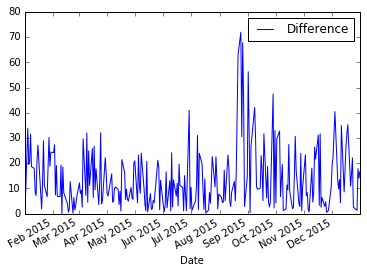

In [177]:
df3.plot(x='Date',y='Difference',kind='line')

### Volume histogram 

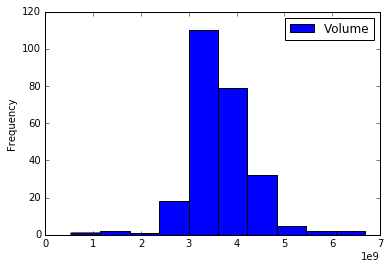

In [178]:
spData.plot(x='Date',y='Volume',kind='hist')

### Volume Line graph vs index movement 

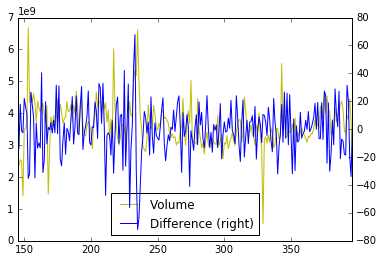

In [207]:
#spData.plot(x='Date',y='Volume',kind='line')
#plt.plot(spData.Date,spData.Volume,'y')
spData['Difference']=spData.Close-spData.Open
spData.Volume.plot(label="Volume", legend=True,c='y' )
spData.Difference.plot(secondary_y=True, label="Difference", legend=True)
#plt.plot(spData.Date,df3.Difference,'r')
#plt.show()

#fig = plt.figure()

#plt.plot_date(spData.Date, spData.Volume, 'y')
#plt.plot_date(spData.Date,df3.Difference, 'g')

#fig.autofmt_xdate()
#plt.show()
#spData.plot(x='Date',y=('Difference'=abs(spData.Close-spData.Open)),kind='line')

### Scatter Plot

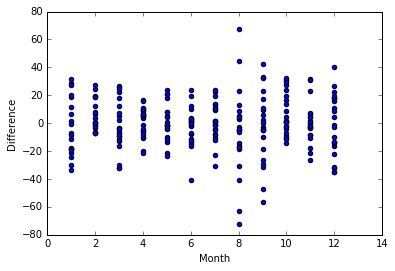

In [286]:
df5=pd.DataFrame({'Date':spData.Date, 'Difference':spData.Close-spData.Open})
df5['Month']= pd.DatetimeIndex(df5['Date']).month

#df5['Month'].value_counts()
df5.plot(kind='scatter',y='Difference',x='Month')

In [142]:

fDataMonthly=pd.read_csv('data/sample_svcg_1999.txt','|',index_col=None, encoding='utf-8',low_memory=False)
fDataMonthly.fillna('0')
fDataMonthly=fDataMonthly[['MONTHLY REPORTING PERIOD','CURRENT LOAN DELINQUENCY STATUS']]
len(fDataMonthly)
#fDataMonthly=fDataMonthly[fDataMonthly['CURRENT LOAN DELINQUENCY STATUS'].apply(lambda x: x.isnumeric())]
#len(fDataMonthly)
#fDataMonthly=fDataMonthly[['MONTHLY REPORTING PERIOD',float('CURRENT LOAN DELINQUENCY STATUS')]]
#fDataMonthly.groupby('MONTHLY REPORTING PERIOD').sum()
fDataMonthly=fDataMonthly[fDataMonthly['CURRENT LOAN DELINQUENCY STATUS'].apply(lambda x: x.isnumeric())]

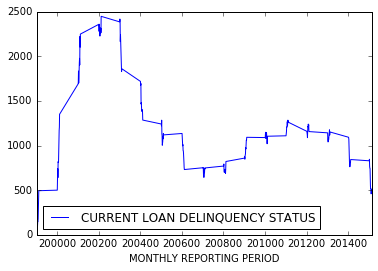

In [154]:

#len(fDataMonthly)
fDataMonthly['CURRENT LOAN DELINQUENCY STATUS']=fDataMonthly['CURRENT LOAN DELINQUENCY STATUS'].astype('float64')
fDataMonthly
fDataMonthlyAgr=fDataMonthly.groupby('MONTHLY REPORTING PERIOD').sum()
fDataMonthlyAgr.plot()

In [6]:
fLoanMetaData = pd.read_csv('../data/sample_orig_1999.txt','|',index_col=None, encoding='utf-8',low_memory=False)
fLoanMetaData.head()

,CREDIT SCORE,FIRST PAYMENT DATE,FIRST TIME HOMEBUYER FLAG,MATURITY DATE,METROPOLITAN STATISTICAL AREA,MORTGAGE INSURANCE PERCENTAGE,NUMBER OF UNITS,OCCUPANCY STATUS,CLTV,DTI Ratio,...,PRODUCT TYPE,PROPERTY STATE,PROPERTY TYPE,POSTAL CODE,LOAN SEQUENCE NUMBER,LOAN PURPOSE,ORIGINAL LOAN TERM,NUMBER OF BORROWERS,SELLER NAME,SERVICER NAME
0,799,199903,N,202901,37620.0,000,1,O,70.0,25,...,FRM,WV,SF,26100.0,F199Q1000012,N,359,1.0,Other sellers,Other servicers
1,635,200212,N,202904,10420.0,000,1,O,76.0,21,...,FRM,OH,SF,44700.0,F199Q1000024,P,317,2.0,Other sellers,Other servicers
2,787,199905,N,202904,12060.0,,1,O,80.0,18,...,FRM,GA,PU,30500.0,F199Q1000036,P,360,2.0,FT MORTGAGE COMPANIE,CHASEMTGECO
3,726,199904,N,202903,28140.0,000,1,O,80.0,37,...,FRM,KS,SF,66000.0,F199Q1000060,P,360,2.0,FLEET MORTGAGE CORPO,Other servicers
4,748,199905,NaN,202904,17140.0,,1,O,80.0,28,...,FRM,OH,SF,45200.0,F199Q1000097,N,360,2.0,Other sellers,Other servicers
